In [2]:
import numpy as np
import matplotlib.pyplot as plt
import iminuit
from IPython.display import Image
from iminuit import cost
from argparse import Namespace

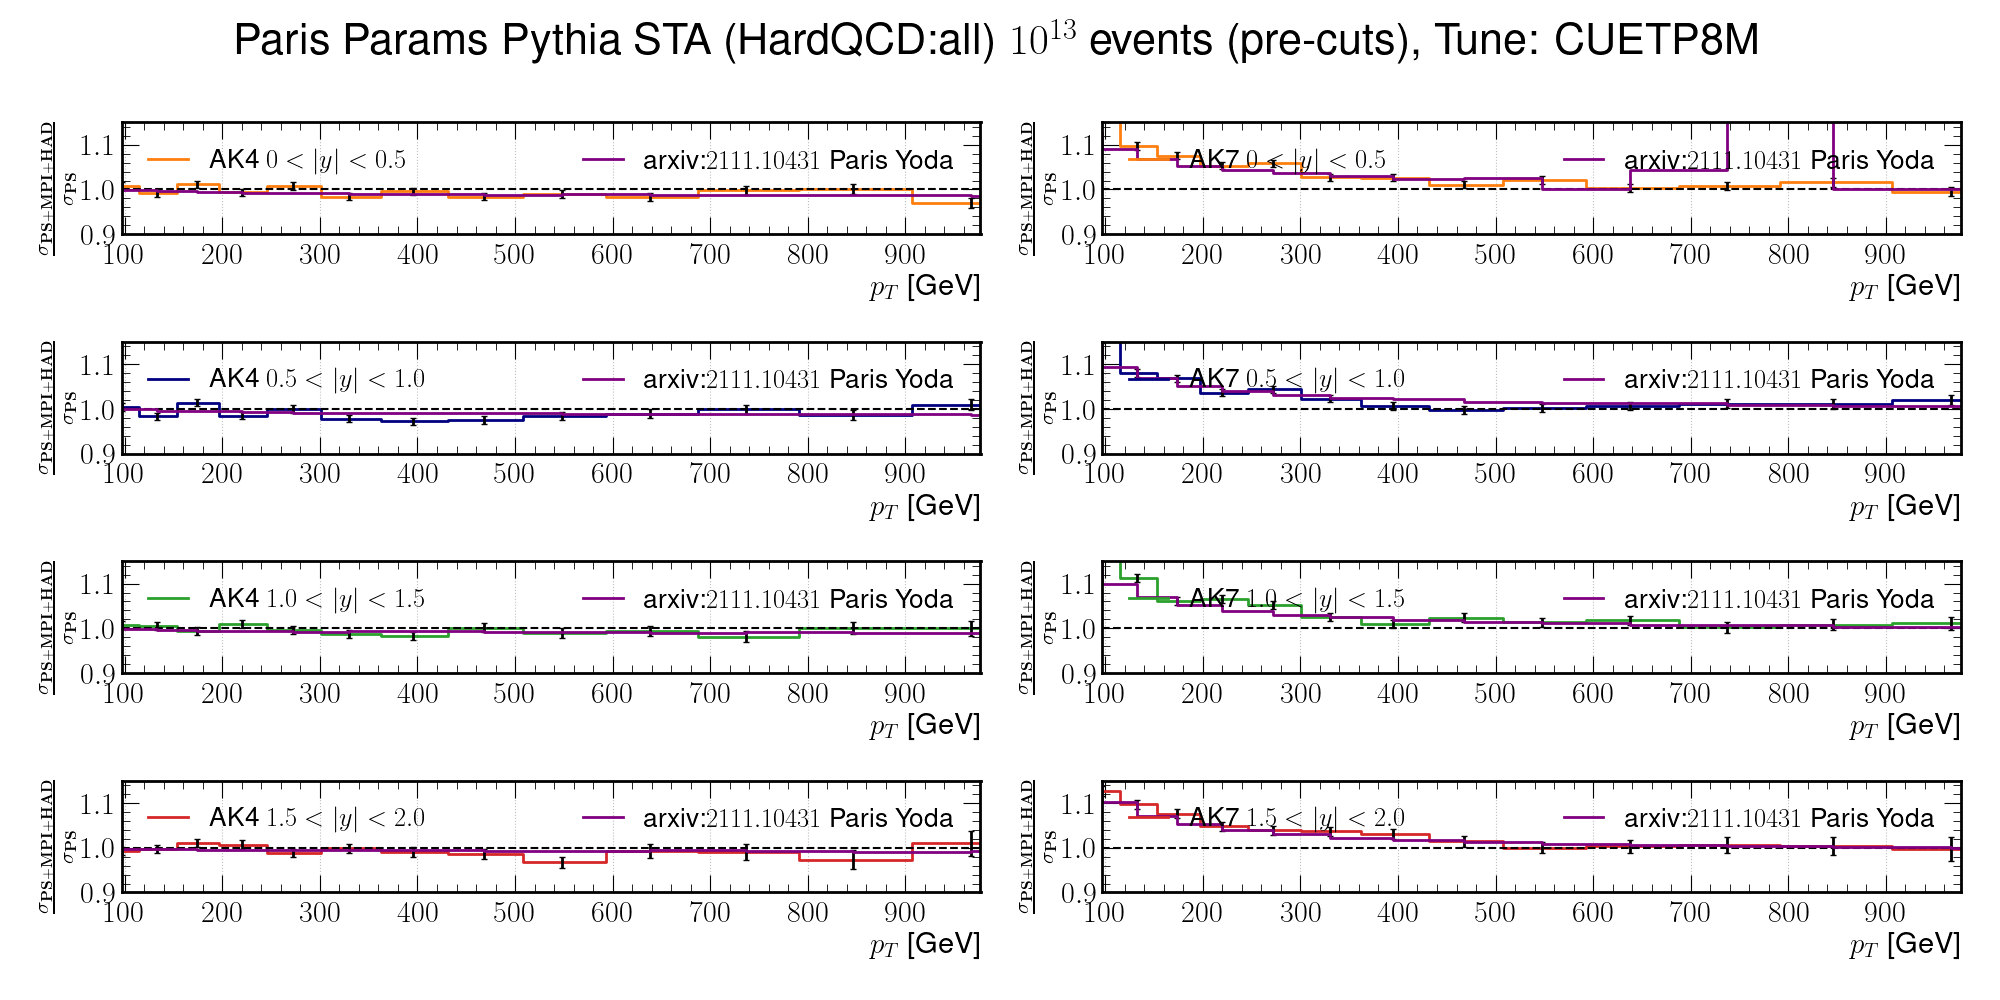

In [7]:
Image('/home/ali/Desktop/Pulled_Github_Repositories/NPCorrection_InclusiveJets/rivet+pythia/PYTHIA_STANDALONE/Paris_CUETP8M_10T/ALLBINS_Paris_Params_HardQCD_Paris_CUETP8M_10T_PYTHIA_STANDALONE_CUETP8M.png', height=600,width=1200
)

It's interesting to note that 
* the NP corrections are considerable for AK7 but pretty much negligible (or actually slightly less than 1) for AK4, so there must be a cone size (say 0.5) in which NPs are completely negligible
* The fact that the corrections low $p_T$ for AK7 are > 1 implies that the spectrum is steeps for post-hadronization than pre-hadronization. If you have a steeply falling spectrum, there is higher probability for events to migrate from low to higher pT than for events to migrate from high pT to lower pT; therefore the spectrum should soften.
* MPI cause there to be more low-$P_T$ jets than if there were no MPI. 
* Combining the two points above, i.e. that hadronization is like a smearing effect that softens the spectrum and MPI causing low-pT jets, then $\frac{\sigma_{PS+HAD}}{\sigma_{PS}}$ for AK7 should look like the one for AK4.

It is not surprising that the corrections are different for AK4 than for AK7 (for AK7 they're about 5X larger), because:
* The larger the cone size, the fewer the number of jets, because the jets will take more particles so there will be fewer particles left over to create jets.
* A jet is always defined to have a $p_T^{jet}$ threshold, where $p_T^{jet} = \sum_{i} p_T^{parton}$ is the sum over the constinuents of the jets. It is more likely for an AK7 jet to pass the threshold than an AK4, since it has more partons.


We want to choose a curve that goes to 1 at high pt. The precision is highest at low pT, as indicated by:


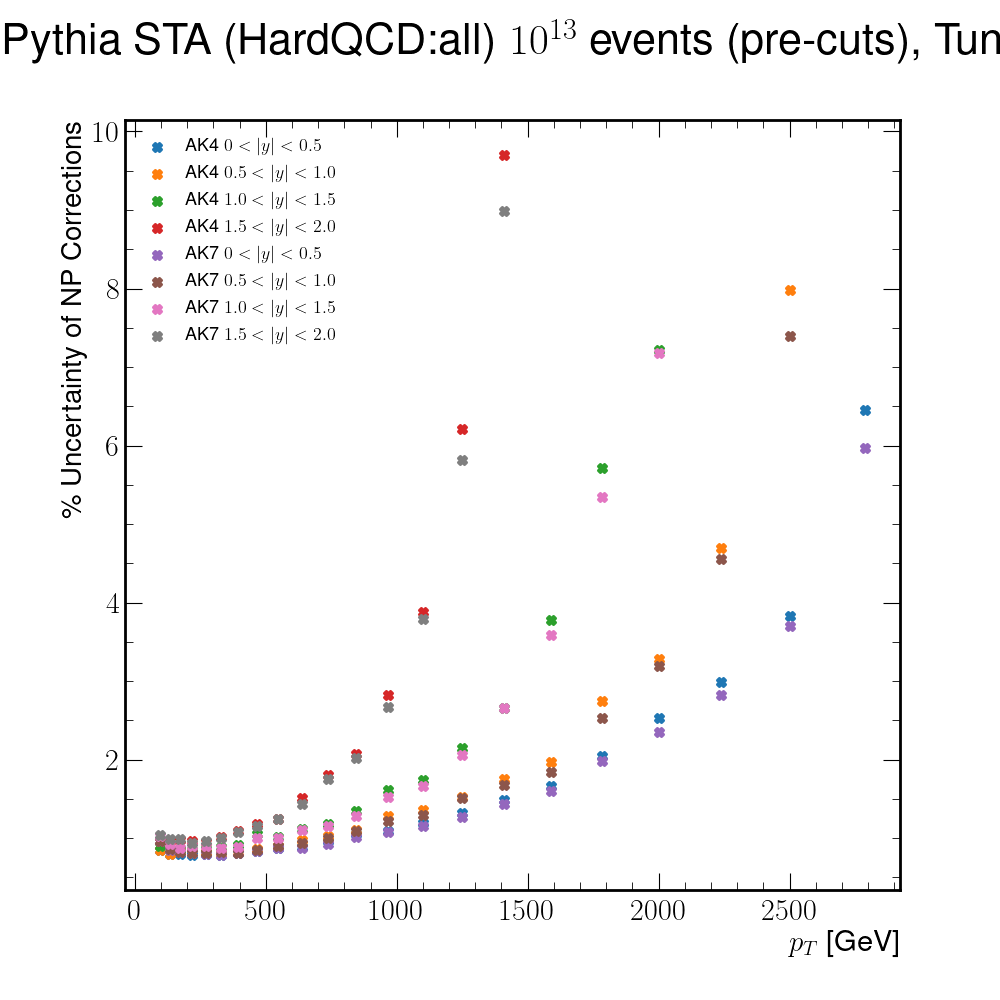

In [9]:
Image('/home/ali/Desktop/Pulled_Github_Repositories/NPCorrection_InclusiveJets/rivet+pythia/PYTHIA_STANDALONE/Paris_CUETP8M_10T/errs_allbins.png',height=400,width=400)

Therefore the accuracy is best at low $p_T$ and hence the function that we fit will be anchored by the values at low $p_T$. Therefore, we can fit the whole $p_T$ range, i.e. go as hig as we want in $p_T$.
For example, if we use $\chi^2$ as the goodness of fit (cost func) then it will be dominated by the values at low $p_T$

The function they choose in [the previous measurement](https://arxiv.org/pdf/2111.10431.pdf) is

$f \left( p_T; \vec{\theta} \right) = a_0 + \frac{a_1}{p_T^{a_2}}$

Currently, we are taking the NP corrections as a ratio of counts. Let's think of one $p_T$ bin, say the bin $i$ where $p_T \in [97, 133]$ GeV. Then the NP Correction in bin $i$ is
<font size="4">
$NPC^i = \frac{\sigma_{PS+MPI+HAD}^i}{\sigma_{PS}^i} \approx \frac{N_{PS+MPI+HAD}^i}{N_PS^i} = \frac{N_{\alpha,i}}{N_{\beta,i} }$,

where the last equality was just a renaming for convenience. However, since the data is composed of poisson-distributed counts in the numerator and denomenator in bin $i$, i.e.
<font size="4">
$$\sigma_{PS+MPI+HAD}^i = \frac{e^{-\alpha_i} \alpha_i^{N_{\alpha,i}} }{N_{\alpha,i} !} $$
$$\sigma_{PS}^i = \frac{e^{-\beta_i} \beta_i^{N_{\beta,i}} }{N_{\beta,i} !} $$;

And hence the likelihood is 
<font size="6">
$$ L = \frac{e^{-\alpha_i} \alpha_i^{N_{\alpha,i}} }{N_{\alpha,i} !} \frac{e^{-\beta_i} \beta_i^{N_{\beta,i}} }{N_{\beta,i} !}  $$

Where $\alpha_i$ and $\beta_i$ are the mean counts in bin $i$ in the numerator and denominator, respectively. What we really want to estimate is the mean count of the ratio in bin $i$: $r_i = \frac{\alpha_i}{\beta_i}$. We can rewrite the likelihood in terms of this parameter by $\alpha_i = r_i \beta_i$
<font size="6">
$$ L = \frac{e^{-r_i \beta_i} (r_i \beta_i)^{N_{\alpha,i}} }{N_{\alpha,i} !} \frac{e^{-\beta_i} \beta_i^{N_{\beta,i}} }{N_{\beta,i} !} $$

    
Where now $r_i$ is the parameter of interest and $\beta_I$ is a nuissance parameter. We can profile the likelihood over the nuissance parameter and get $L (r_i, \hat{\beta_i} )$
Doing a fit over the whole range (naive)

</font>


# Lets do a $\chi^2$ (naive) fit in the first AK4 rapidity bin over the first 4 pt bins


[ 115.   153.5  197.   246.   301.   362.5  431.5  508.   593.   687.5
  791.5  906.5 1034.  1174.5 1329.  1499.  1686.  1892.  2119.  2369.
 2643.5 2945. ]
(22,) (22,)


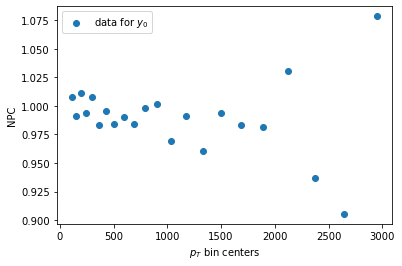

In [154]:
edges_y0 = np.array([  97,  133,  174,  220,  272,  330,  395,  468,  548,  638,  737,  846,
  967, 1101, 1248, 1410, 1588, 1784, 2000, 2238, 2500, 2787, 3103])

# edges_y0 = edges_y0[:13]
bin_centers_y0 = (edges_y0[:-1]+edges_y0[1:])/2
# pre4_y0=[1.163744e+04 2.642488e+03 7.098741e+02 2.178400e+02]
# post4_y0=[1.173045e+04 2.618880e+03 7.179274e+02 2.164112e+02]
NPC4_y0 = np.array([1.00799231, 0.991066,   1.01134469, 0.99344106, 1.00772026, 0.98328357,
 0.99558591, 0.9840365,  0.99059843, 0.98413098, 0.99810374, 1.00128087,
 0.96900885, 0.99092376, 0.96028632, 0.99365639, 0.98304044, 0.9812955,
 1.03067118, 0.93647588, 0.90536527, 1.07863482])
# NPC4_y0 = NPC4_y0[:12]
# error_NPC4_y0=np.array([0.00850679, 0.00801902, 0.00830804])
# NPCy0 = [float(item.replace('\s', ',')) for item in NPC_y0.split()]
plt.scatter(bin_centers_y0, NPC4_y0, label='data for $y_0$')

# print(edges_y0.shape, NPC_y0.shape)
# data = Namespace()
# data.n = NPC_y0
# data.edges = edges_y0
print(bin_centers_y0)
print(bin_centers_y0.shape, NPC4_y0.shape)
plt.xlabel('$p_T$ bin centers'); plt.ylabel('NPC')
plt.legend()

In [155]:
from scipy.optimize import curve_fit
# help(curve_fit)

In [156]:
def model(x, *pars):
    a0, a1, a2  = pars
    return a0 + a1/(x**a2)

initial_guess = (1,1,1) # initial guess for a0, a1, a2

#toy data
pt_range = np.linspace(10,3000, 22)
num_toy = np.random.exponential(100,size=22)*2
#this is like the poisson counts in each pt bin
den_toy = np.random.exponential(100,size=22)

NPC_toy, edges = np.histogram(num_toy/den_toy, bins=22)

edges_centers=(edges[:-1]+edges[1:])/2

In [157]:
##TRY TOY DATA WITH CURVE_FIT
params, paramcov = curve_fit(model, 
                             xdata=pt_range, 
                             ydata= NPC_toy, 
                             p0=initial_guess, 
                             # sigma=error_NPC4_y0
                            )
uncertainties = np.ones_like(pt_range)
chi2 = np.sum((NPC_toy - model(edges_centers, *params) )**2 )
nu=len(edges_centers) - len(params)
print(nu)

19


/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
# TRY REAL DATA
params, paramcov = curve_fit(model, 
                             xdata=bin_centers_y0, 
                             ydata= NPC4_y0, 
                             p0=initial_guess, 
                             # sigma=error_NPC4_y0
                            )


calculate $\chi^2$ (for now with uncertainies equal to 1) and $\nu$

<font size="4">
$\chi^2 = \sum_{i=1}^N \frac{(y_i - f(x_i) )^2 }{\delta_{y_i}^2} =  \sum_{i=1}^N \frac{(y_i - f(x_i) )^2 }{y_i} $

<\font>
Where $x_i$ is the histogram bin minpoints (of the ratio), $y_i$ are the values, $\delta_{y_i}$ are the uncertainties. And since this is just count data, $\delta_{y_i} = \sqrt{y_i}$ which leads to the last equality.

$\nu = N - N_f$ 

Where $N$ is the number of bins and $N_f=3$ is the number of parameters in our model 

In [159]:
chi2 = np.sum((NPC4_y0 - model(bin_centers_y0, *params) )**2 )
nu=len(bin_centers_y0) - len(params)
print(nu)

19


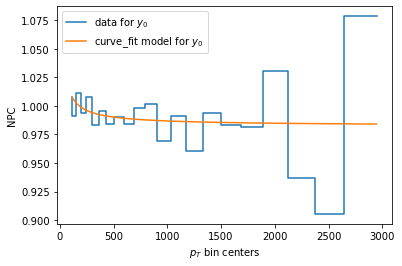

In [160]:
plt.step(bin_centers_y0, NPC4_y0, label='data for $y_0$')
plt.plot(bin_centers_y0, model(bin_centers_y0, *params), label='curve_fit model for $y_0$')


plt.xlabel('$p_T$ bin centers'); plt.ylabel('NPC')
plt.legend()

-----
# Using iminuit

<font size="5">

$\chi^2 = \sum_{i=1}^N \frac{(y_i - f(x_i) )^2 }{\delta_{y_i}^2} =  \sum_{i=1}^N \frac{(y_i - f(x_i) )^2 }{y_i} $
</font>

In [161]:
x=bin_centers_y0
y = NPC4_y0
def model(
           # x,
          # a0, a1, a2 
          pars
         ):
    a0, a1, a2  = pars
    return a0 + a1/(x**a2)

def chi2(
    # x, y, 
    # a0, a1, a2 
         pars
        ):
    # a0, a1, a2  = pars
    # f = model(x, a0, a1, a2)
    f = model(pars)
    return np.sum(((y-f)**2)/y)
#the cost function is chi2 not negative log-likelihood
chi2.errordef = iminuit.Minuit.LEAST_SQUARES

In [162]:
# help(iminuit.Minuit)

In [163]:
initial_guess = [1.,1.,1.]
result=iminuit.minimize(chi2, initial_guess)

In [164]:
result.keys()

dict_keys(['x', 'success', 'fun', 'hess_inv', 'message', 'nfev', 'njev', 'minuit'])

In [165]:
print(result.minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.02176                    │              Nfcn = 65               │
│ EDM = 2.74e-05 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

In [166]:
print(result.success, result.message)

True Optimization terminated successfully.


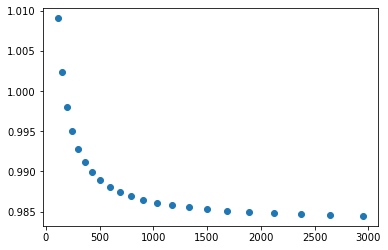

In [167]:
plt.scatter(x,model(result.x))

In [168]:
print(result.minuit.parameters)
for p in result.minuit.parameters:
    print(result.minuit.values[p])
    
    print(result.minuit.errors[p])

('x0', 'x1', 'x2')
0.9836593035290684
0.2500840690601585
3.9581559298570674
471.69790040393343
1.0639140090361536
25.114022222852757


In [169]:
a0, a1, a2 = result.x
print(a0, a1, a2)
cov = result.hess_inv
std_a = np.sqrt(np.diag(cov))

0.9836593035290684 3.9581559298570674 1.0639140090361536


In [170]:
chi2min = result.minuit.fval
ndof = result.minuit.ndof
print(chi2min)

0.021762523319704533


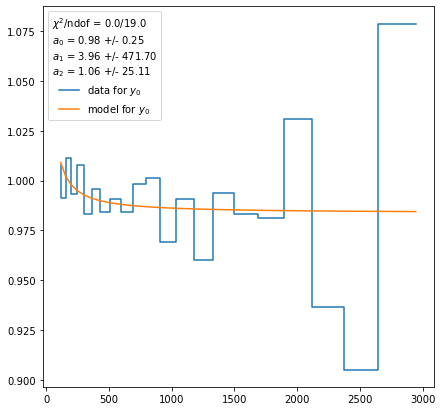

In [171]:
N = len(x)
Nf = 3
nu = N-Nf#=ndof
ndof= nu

plt.figure(figsize=(7,7))
plt.step(x, y, label='data for $y_0$')
plt.plot(x, model(result.x), label='model for $y_0$')

legend = [f"$\chi^2$/ndof = {chi2min:.1f}/{ndof:.1f}"]
minuit = result.minuit
names=['$a_0$', '$a_1$', '$a_2$']  
for i, p in enumerate(minuit.parameters):
    legend.append(f"{names[i]} = {minuit.values[p]:.2f} +/- {minuit.errors[p]:.2f}")


plt.legend(title='\n'.join(legend))

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in square


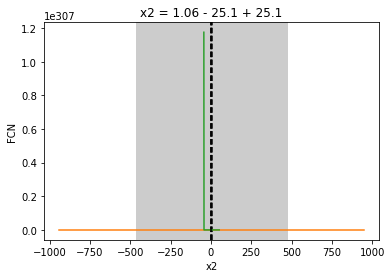

In [172]:
for p in minuit.parameters:
    _=minuit.draw_profile(p)

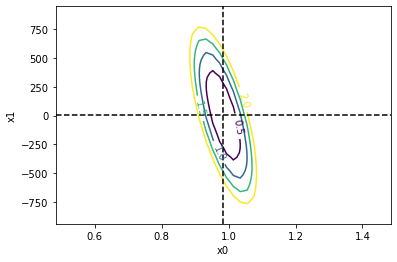

In [173]:
_ =minuit.draw_contour("x0","x1")

In [174]:
cov#from iverse hessian

,x0,x1,x2
x0,0.0625,54.8 (0.465),3.68 (0.586)
x1,54.8 (0.465),2.22e+05,1.16e+04 (0.980)
x2,3.68 (0.586),1.16e+04 (0.980),631


In [175]:
minuit.covariance

,x0,x1,x2
x0,0.0625,54.8 (0.465),3.68 (0.586)
x1,54.8 (0.465),2.22e+05,1.16e+04 (0.980)
x2,3.68 (0.586),1.16e+04 (0.980),631


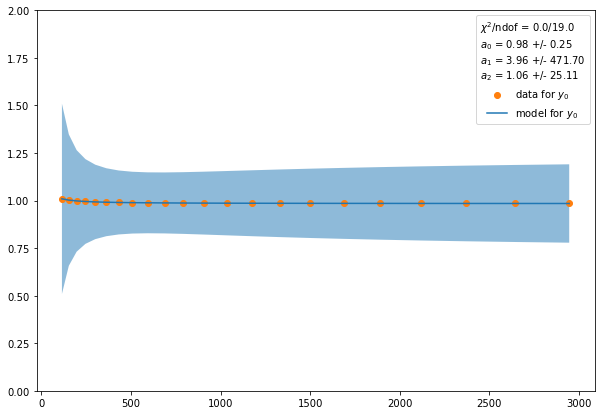

In [176]:
import jacobi

plt.figure(figsize=(10,7))
#propagate the parameter uncertainties I got from minuit to get uncertainties of the model
#i.e. pass the parameters o from minuit to the propagate function
y,ycov = jacobi.propagate(lambda p: model(p), minuit.values, minuit.covariance)
y_std = np.sqrt(np.diag(ycov))
plt.fill_between(x, y-y_std, y+y_std, alpha=0.5)

N = len(x)
Nf = 3
nu = N-Nf#=ndof
ndof= nu

plt.scatter(x, y, label='data for $y_0$')
plt.plot(x, model(result.x), label='model for $y_0$')

legend = [f"$\chi^2$/ndof = {chi2min:.1f}/{ndof:.1f}"]
minuit = result.minuit
names=['$a_0$', '$a_1$', '$a_2$']  
for i, p in enumerate(minuit.parameters):
    legend.append(f"{names[i]} = {minuit.values[p]:.2f} +/- {minuit.errors[p]:.2f}")

plt.ylim(0,2)
plt.legend(title='\n'.join(legend))

----------------------------




# Doing Likelihood fit without Gaussian assumption

Instead of doing a $\chi^2$ fit, we choose to do a proper likelihood fit, which will guarantee that we are taking the statistical uncertainties into account. Once we have the covariance matrix for $\{ a_0, a_1, a_2 \}$ then we can generate many bootstrap samples and then I get the error band in the ratio

In [137]:
def poiss(n, mu):
    return (np.exp(mu) * mu**n) / np.math.factorial(n)